In [108]:
#Importing libraries
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [68]:

data = pd.read_csv('Estate_housing.tsv', sep='\t')
display(data.iloc[:5, :5])

,Order,PID,MS SubClass,MS Zoning,Lot Frontage
0,1,526301100,20,RL,141.0
1,1,526301100,20,RL,141.0
2,2,526350040,20,RH,80.0
3,3,526351010,20,RL,81.0
4,4,526353030,20,RL,93.0


In [69]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [70]:
data["SalePrice"].describe() 

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [71]:
numerical_in_data = data.select_dtypes(include = ['float64', 'int64'])
numerical_in_data_corr = numerical_in_data.corr()['SalePrice']  
top_features = numerical_in_data_corr[abs(numerical_in_data_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print(f"There is {len(top_features)} strongly correlated values with SalePrice:\n{top_features}")
#print(numerical_in_data)

There is 12 strongly correlated values with SalePrice:
SalePrice         1.000000
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64


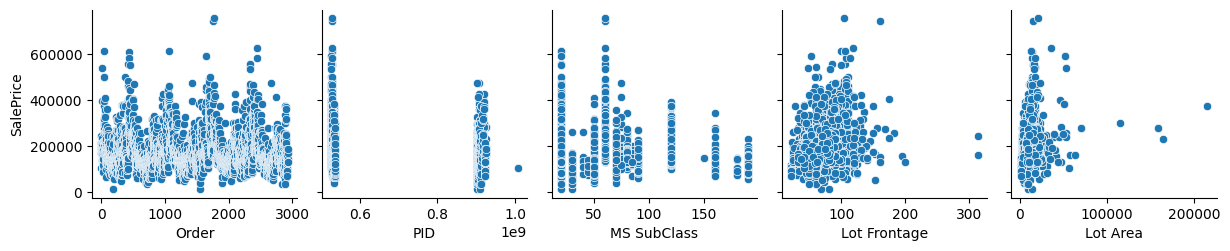

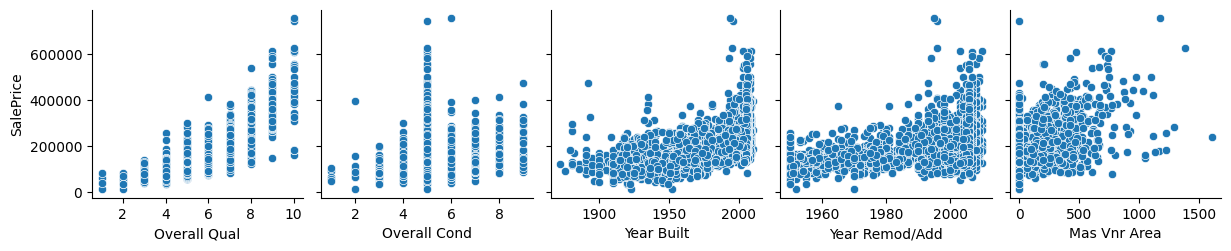

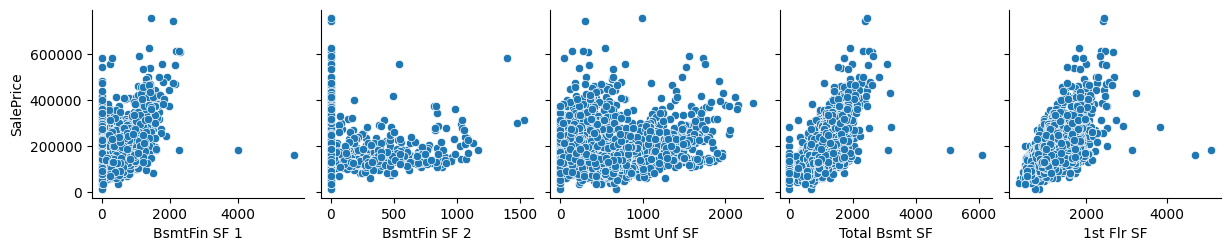

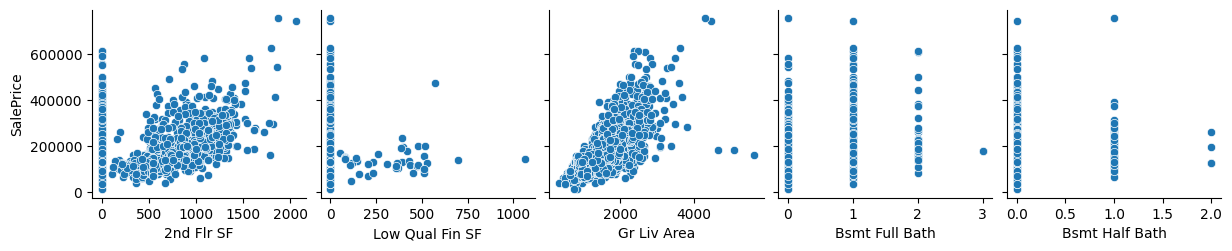

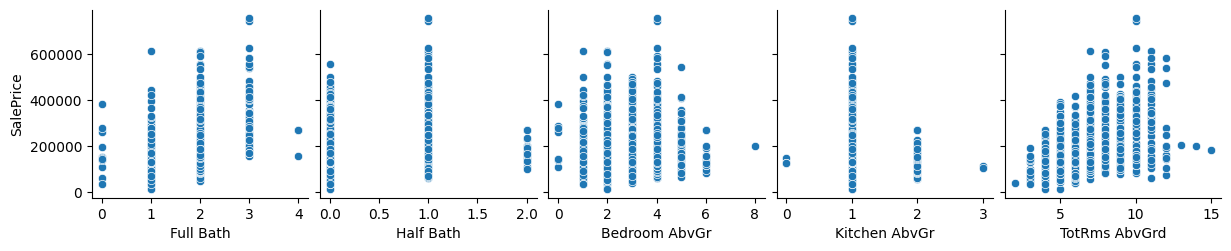

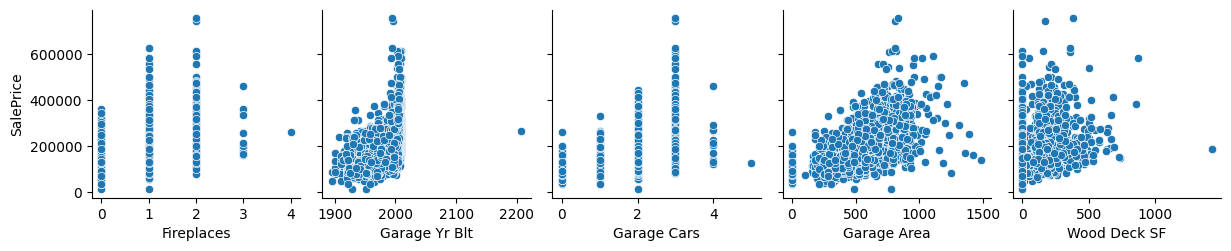

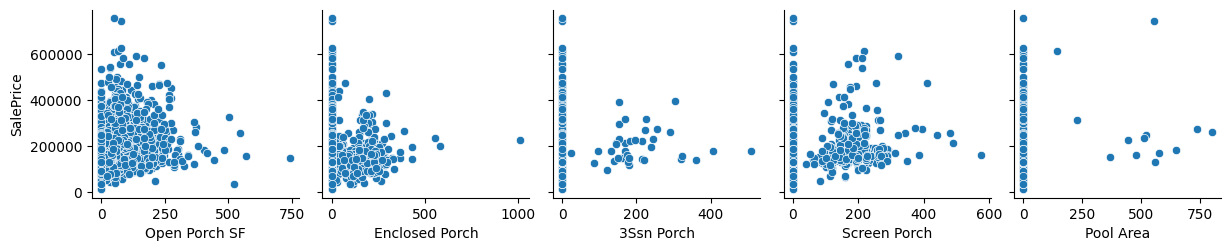

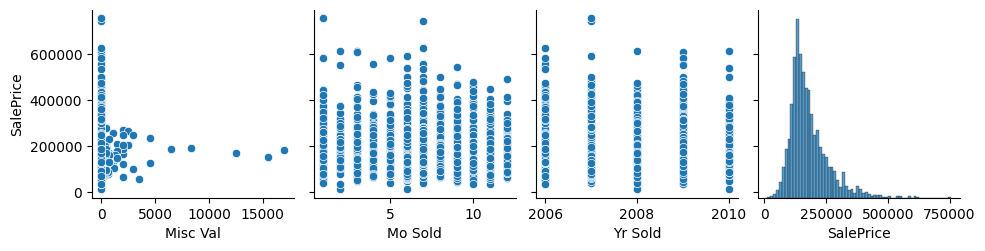

In [72]:
#Visual Inspection of the data
for i in range(0, len(numerical_in_data.columns), 5):
    sns.pairplot(data=numerical_in_data,
                x_vars=numerical_in_data.columns[i:i+5],
                y_vars=['SalePrice'])

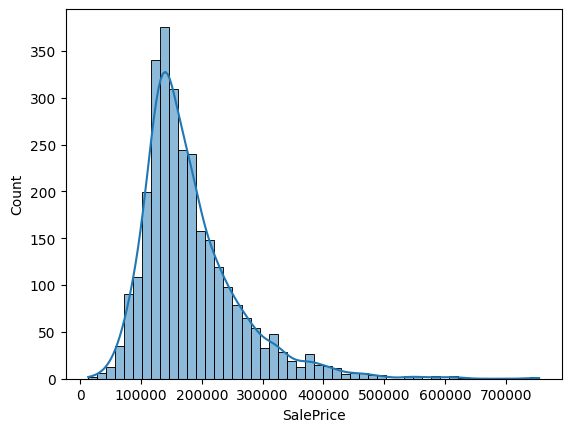

In [73]:

#Histplot for SalePrice
initial_price_plot = sns.histplot(data['SalePrice'], kde=True, bins=50) 

In [74]:
#Printing the skewness of SalePrice
print(f"Skewness of Price: {data['SalePrice'].skew()}")

Skewness of Price: 1.743221853159165


In [75]:
#Log Transformation of SalePrice
log_transformed= np.log(data['SalePrice'])


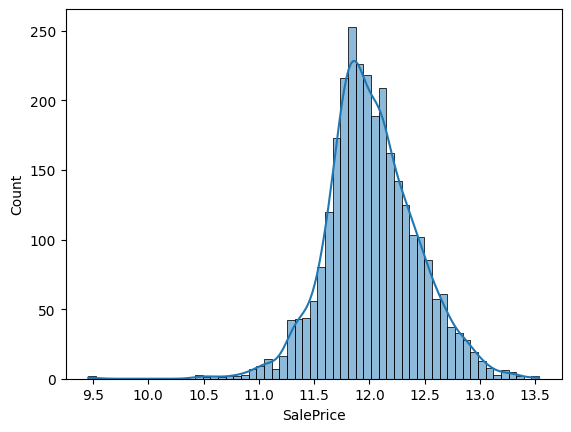

In [76]:
Saleprice_plot = sns.histplot(log_transformed, kde=True)

In [77]:
#Printing skewness
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.015354


In [78]:
#check if there are any duplicate indexes in the dataset
data.index.is_unique  

True

In [79]:
#Check for duplicate entries in the 'SalePrice' column
duplicate = data[data.duplicated(['SalePrice'])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
34,34,527453130,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,149900
75,75,531380080,60,RL,NaN,8880,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,205000
77,77,531451280,60,RL,70.0,11218,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,400,5,2010,WD,Normal,189000
91,91,533130020,60,RL,107.0,10186,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [80]:
#Removing Duplicates
removed = data.drop_duplicates()
removed

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Text(0.5, 1.0, 'Total Missing Values')

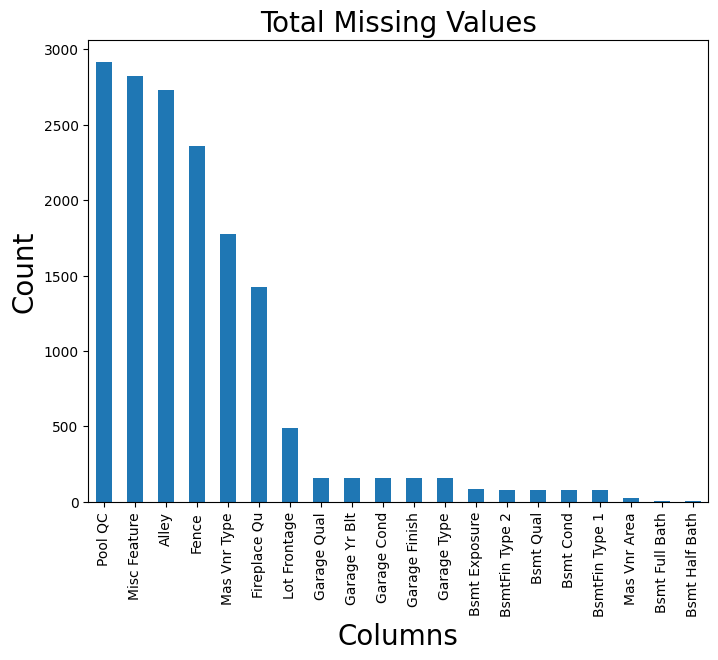

In [81]:
#Check for missing values
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [82]:
#drop the rows with missing values
data_dropped = data.dropna()
print(f"Number of rows after dropping missing values: {len(data_dropped)}")


Number of rows after dropping missing values: 0


In [83]:
#fill missing values with a constant
data_filled_constant = data.fillna(0)
print(f"Number of rows after filling missing values with constant: {len(data_filled_constant)}")


Number of rows after filling missing values with constant: 2931


In [84]:
#Feature Scaling
normalized_data = MinMaxScaler().fit_transform(numerical_in_data)
normalized_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 1.24238256e-01],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        5.45454545e-01, 0.00000000e+00, 1.60616051e-01],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        2.72727273e-01, 0.00000000e+00, 2.11814430e-01],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        9.09090909e-01, 0.00000000e+00, 2.36066294e-01]], shape=(2931, 39))

In [85]:
#standardize the data
standardized_data = StandardScaler().fit_transform(numerical_in_data)
standardized_data


array([[-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.72909781, -0.99656498, -0.87674019, ..., -0.07945953,
         1.67740664, -0.94923488],
       ...,
       [ 1.729097  ,  1.10758639,  0.64804102, ...,  0.2890466 ,
        -1.36026952, -0.61115139],
       [ 1.73027889,  1.11129572, -0.87674019, ..., -0.81647179,
        -1.36026952, -0.13533019],
       [ 1.73146077,  1.11156589,  0.06158671, ...,  1.76307112,
        -1.36026952,  0.09005881]], shape=(2931, 39))

<Axes: xlabel='SalePrice'>

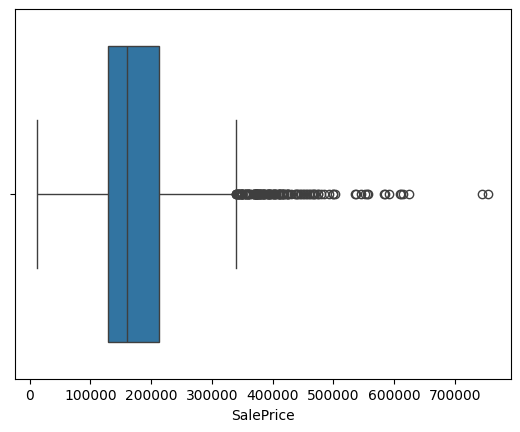

In [86]:
#Handling outliers
#use box plot for univariate analysis of price
sns.boxplot(x=data['SalePrice'])



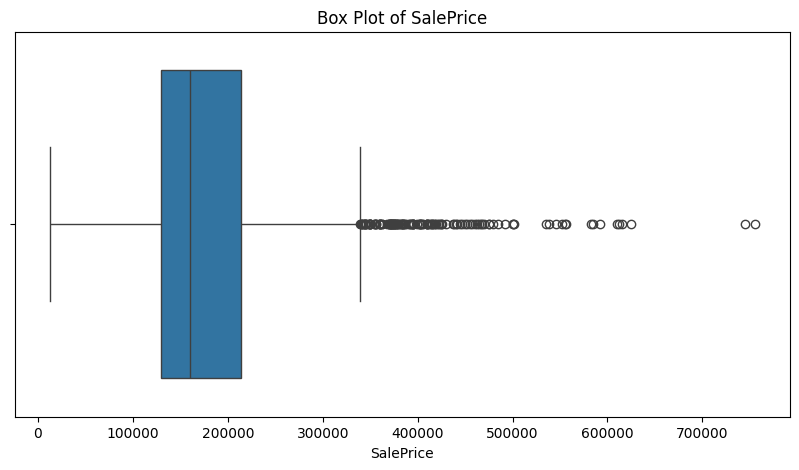

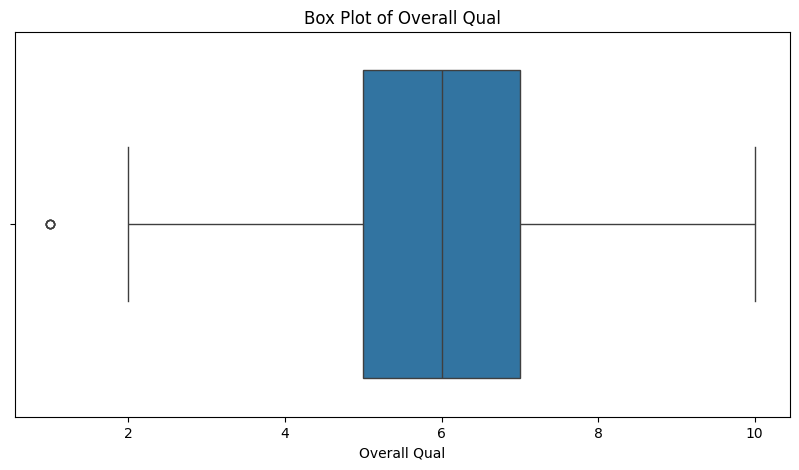

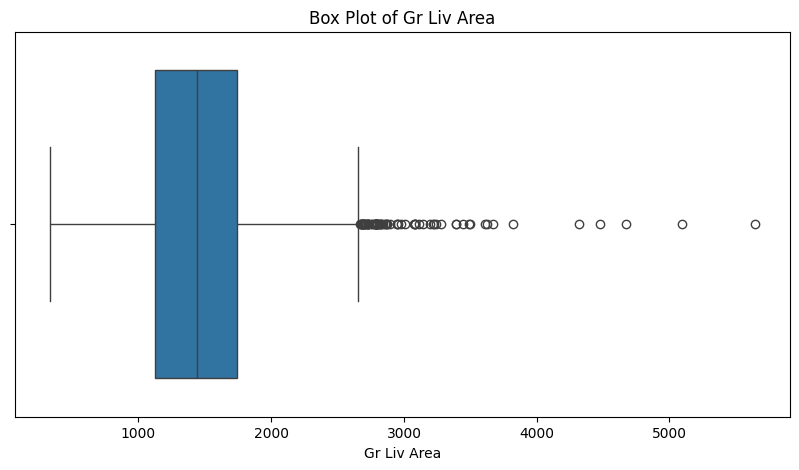

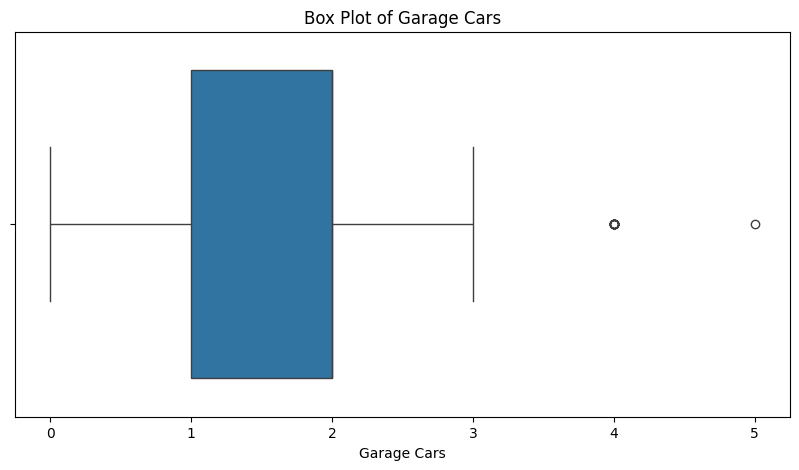

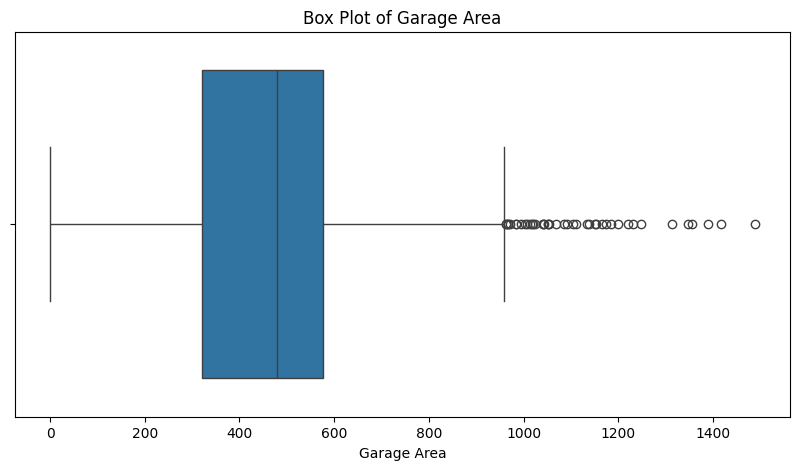

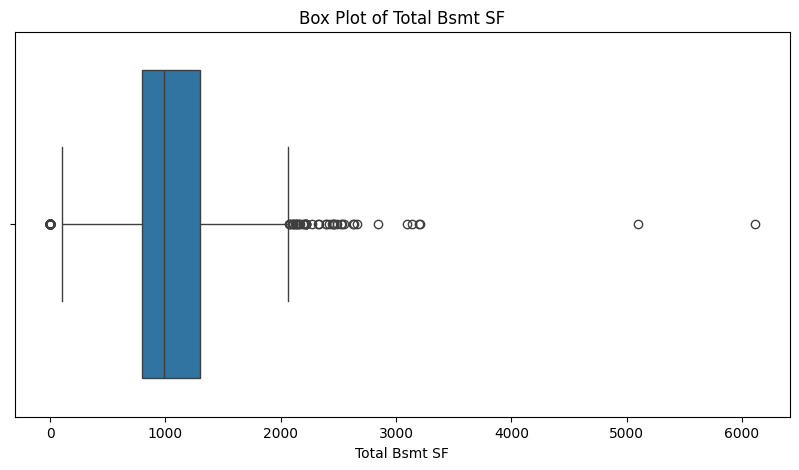

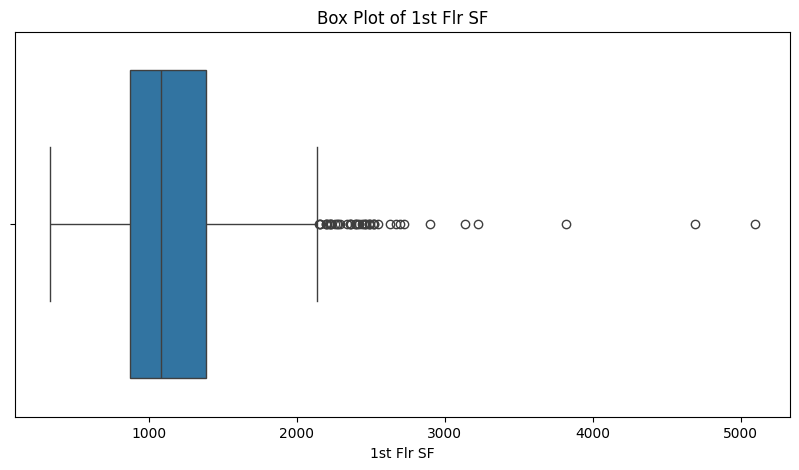

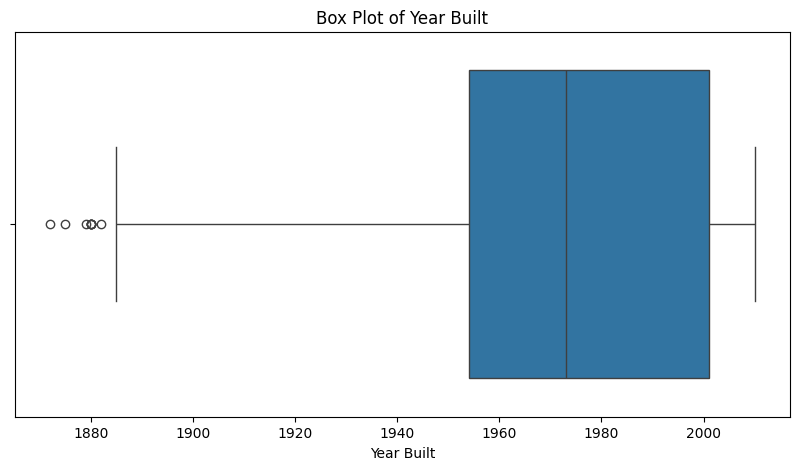

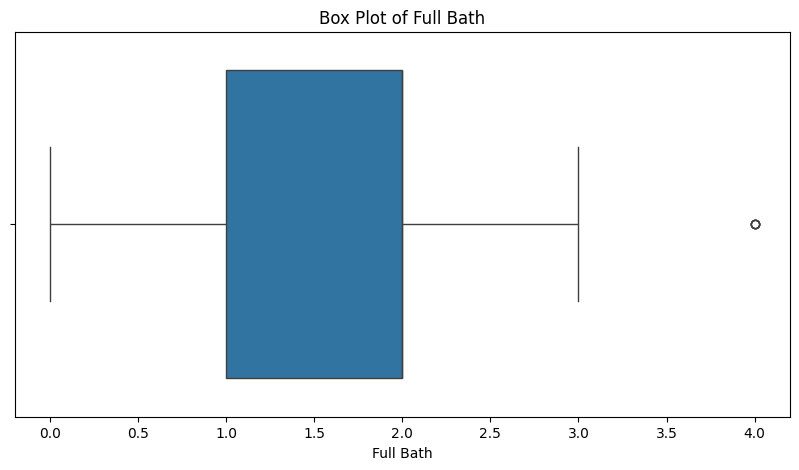

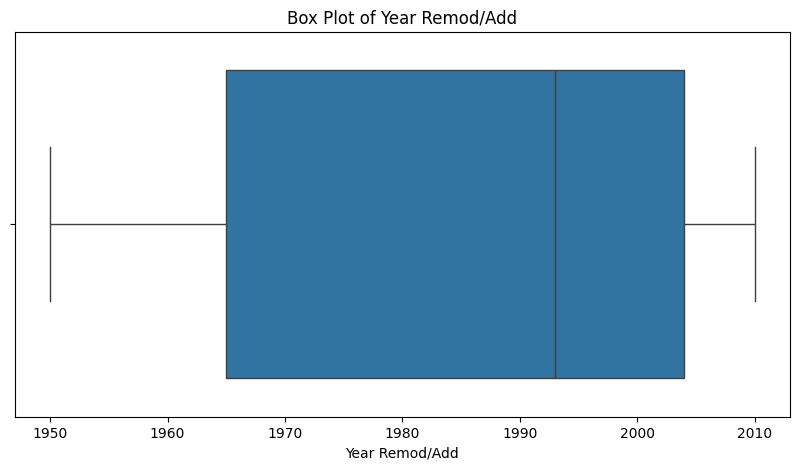

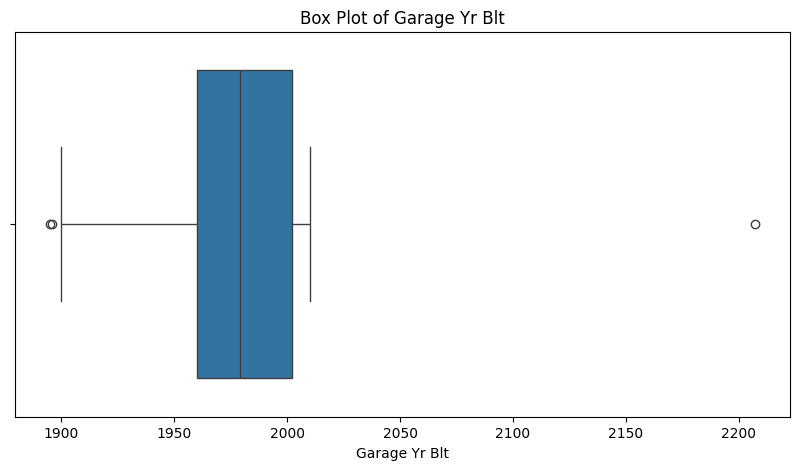

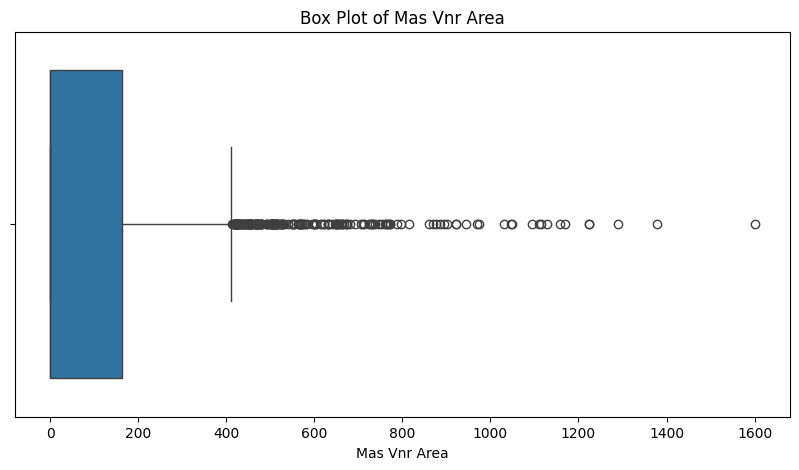

In [87]:
#plot box plot for features above 0.5 correlation with Price
for col in top_features.index:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

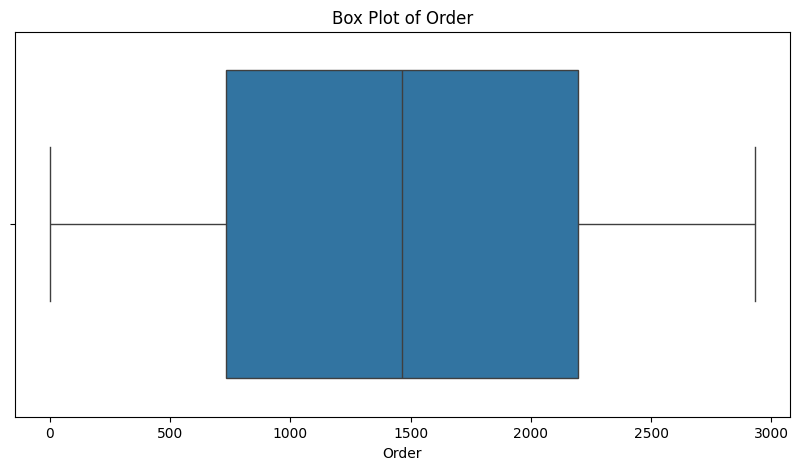

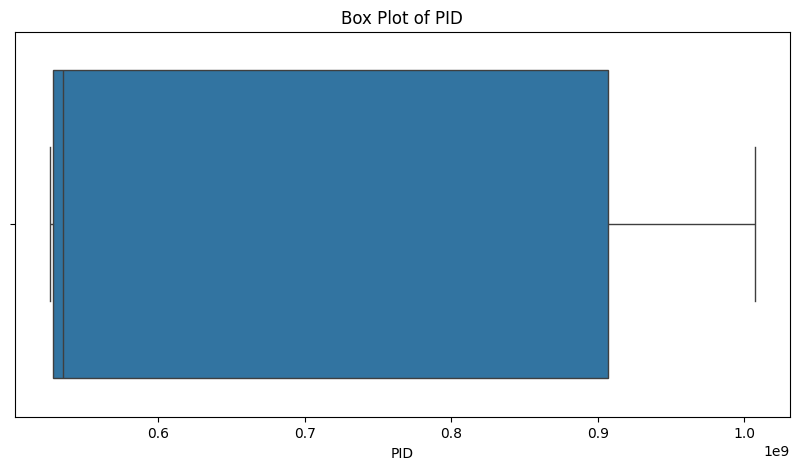

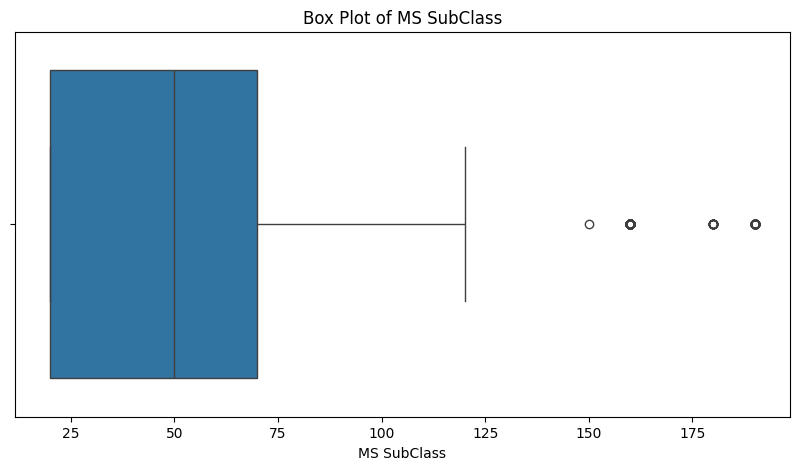

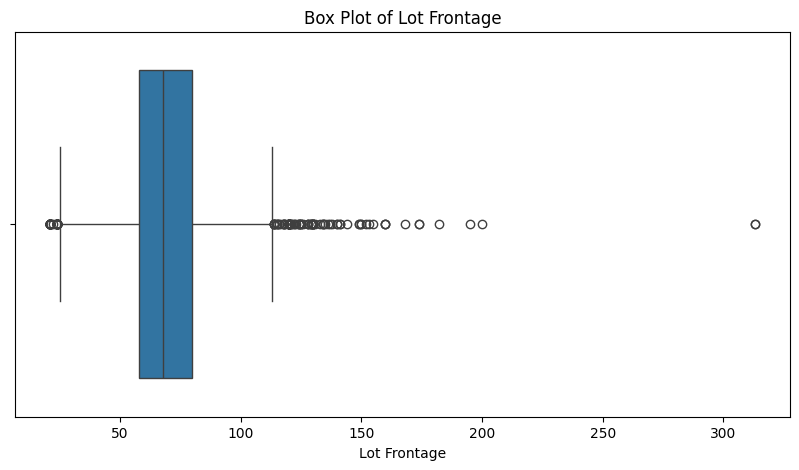

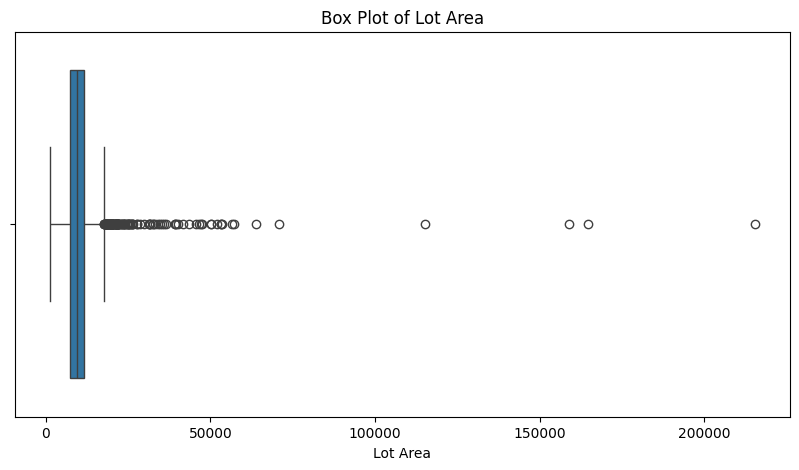

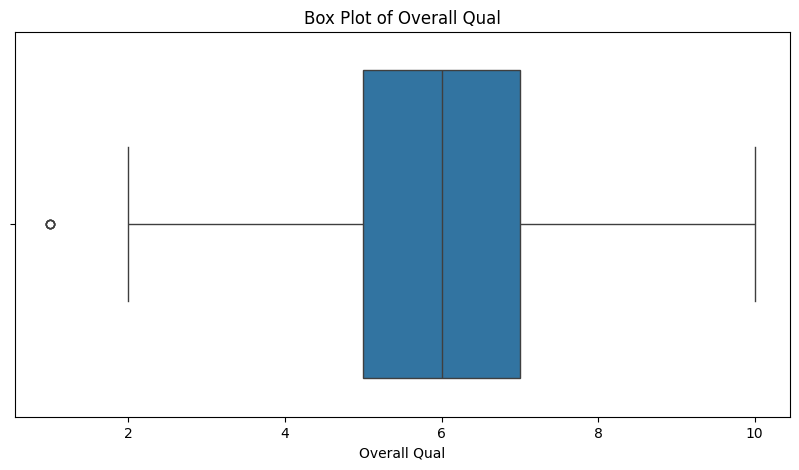

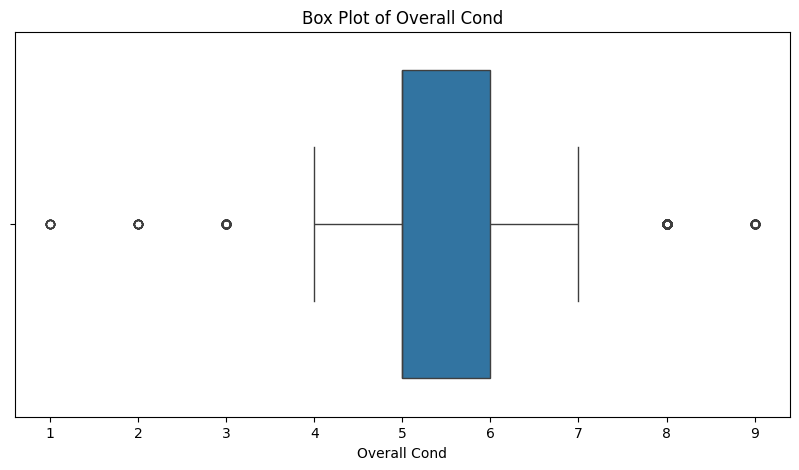

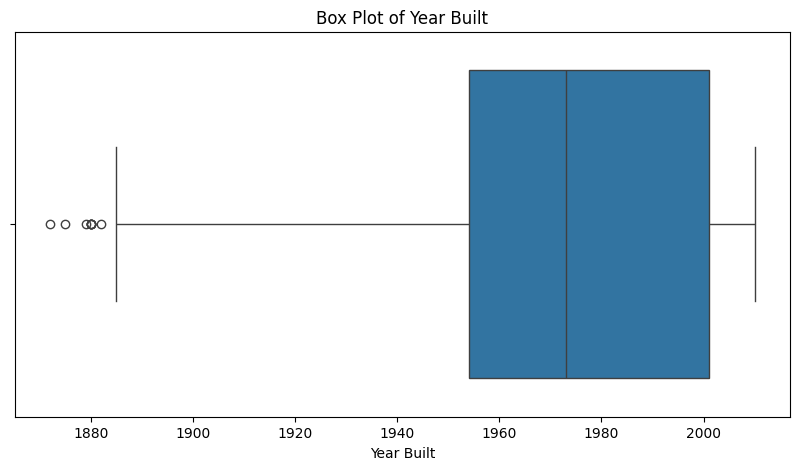

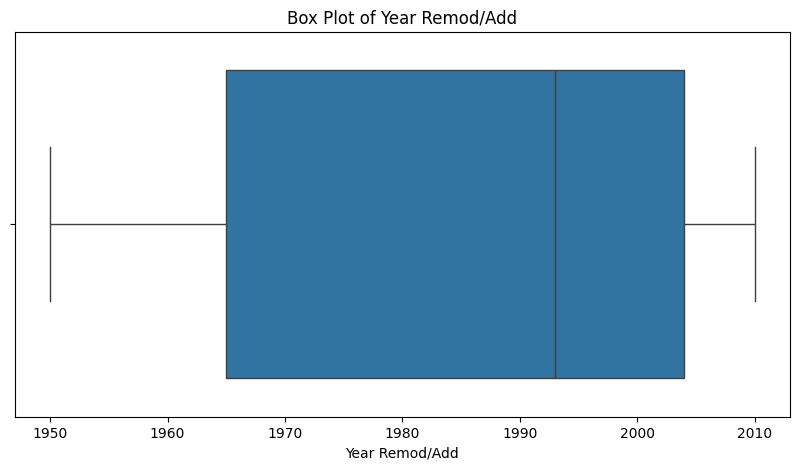

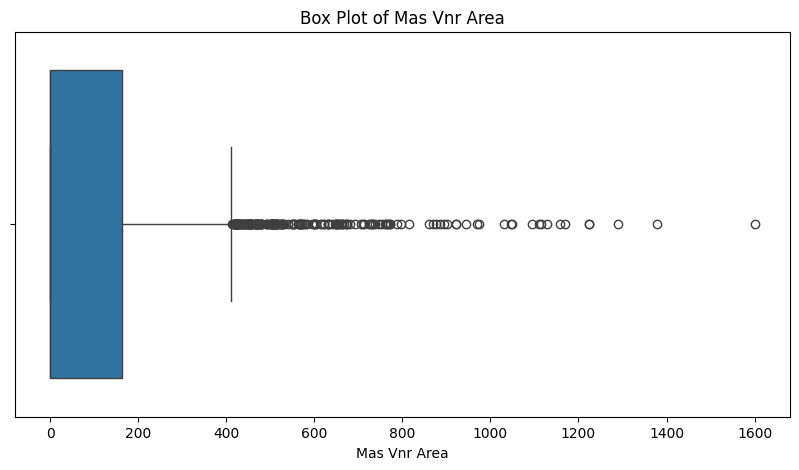

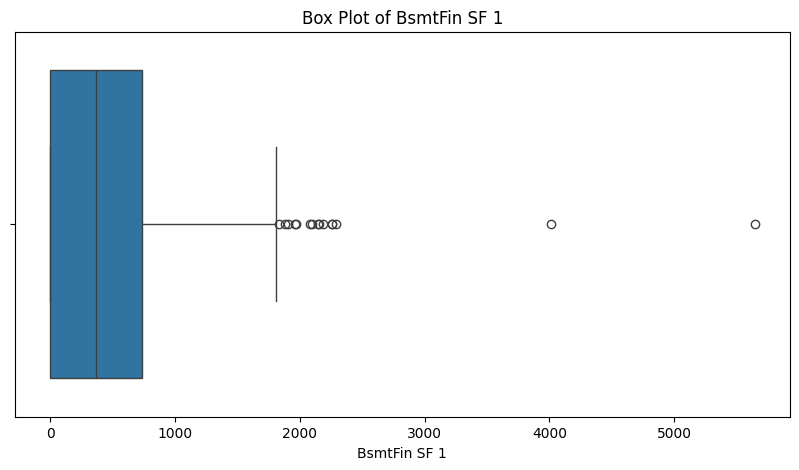

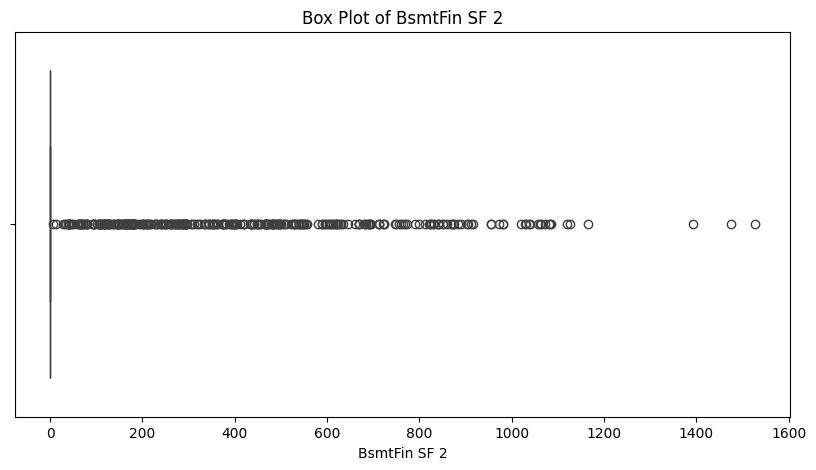

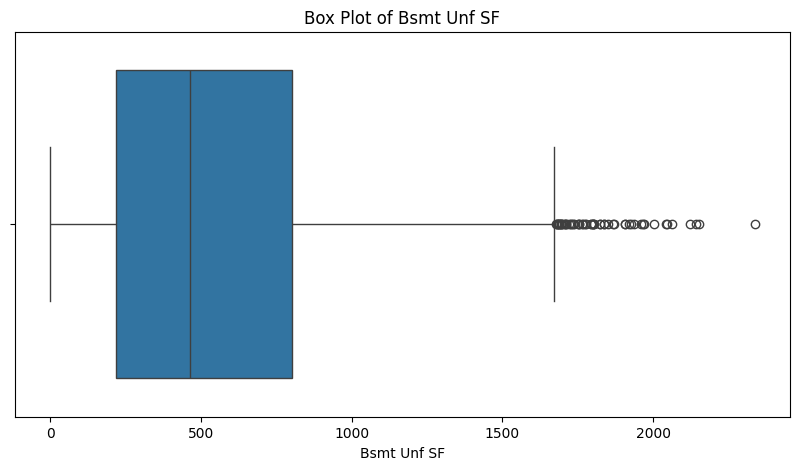

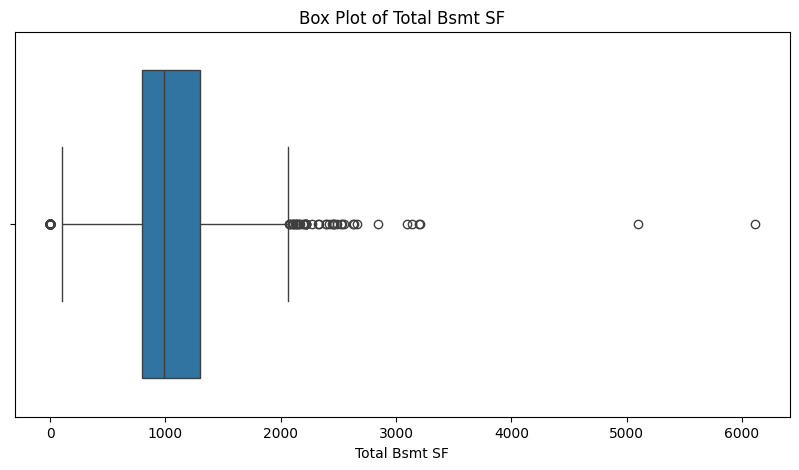

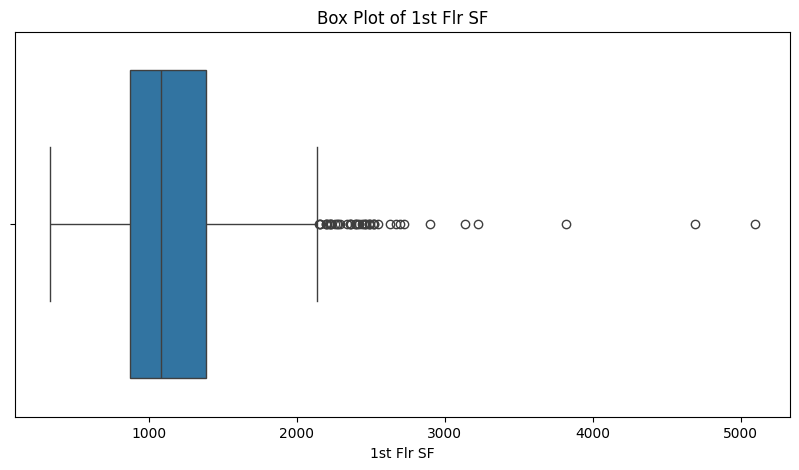

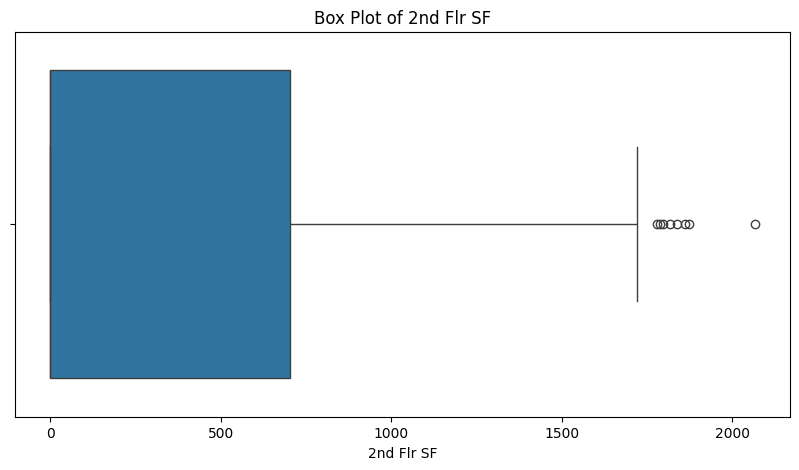

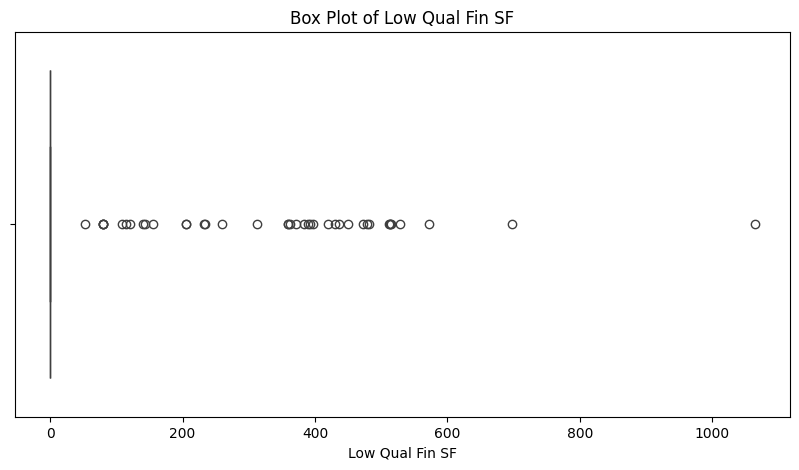

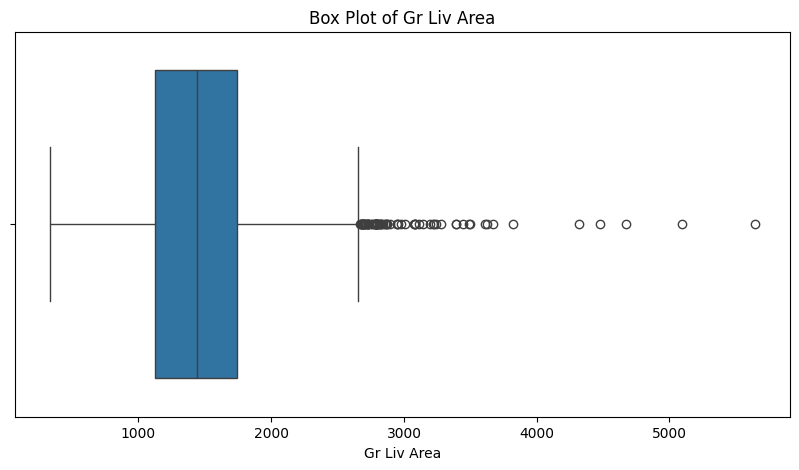

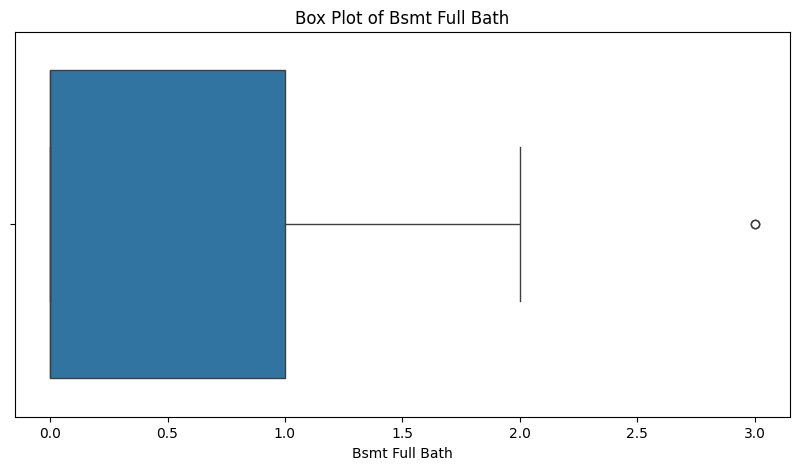

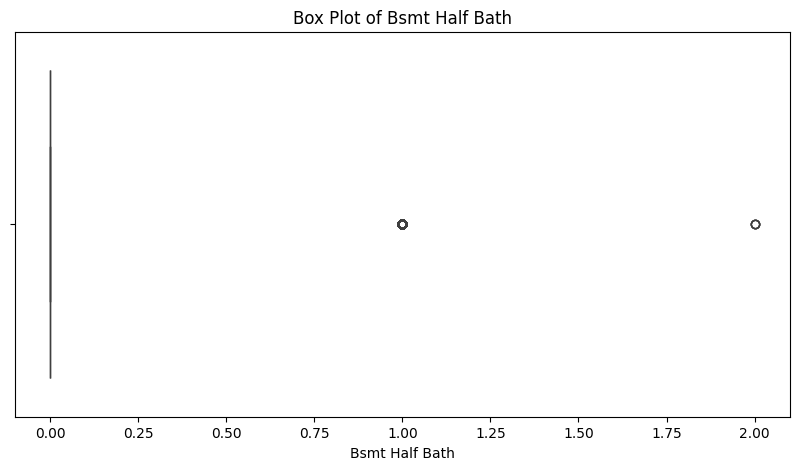

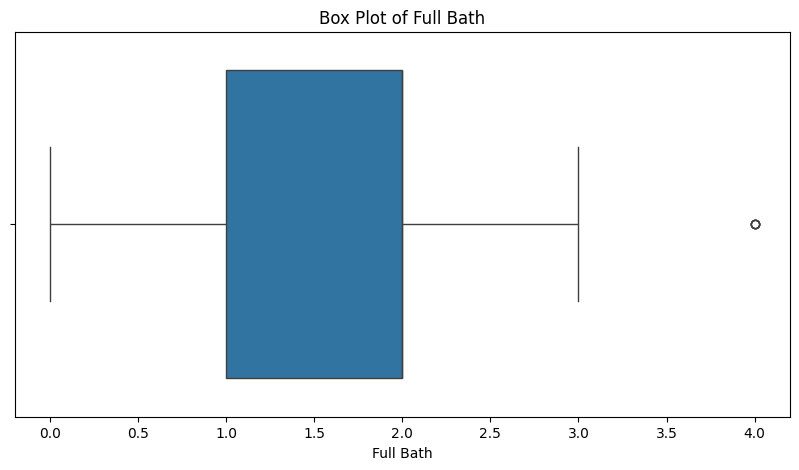

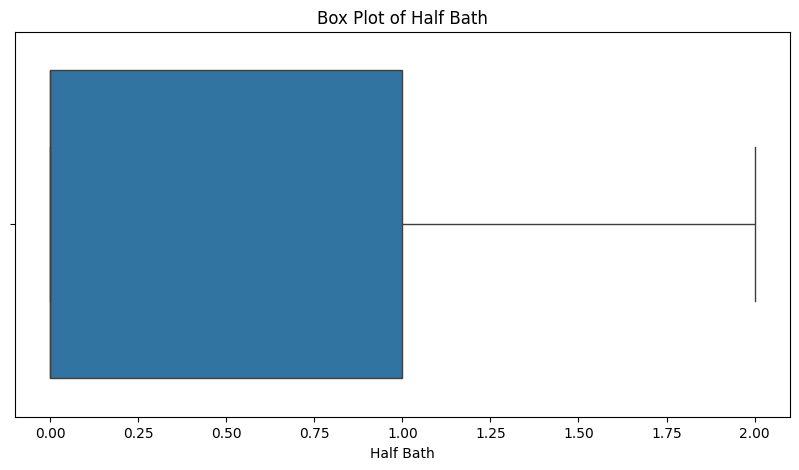

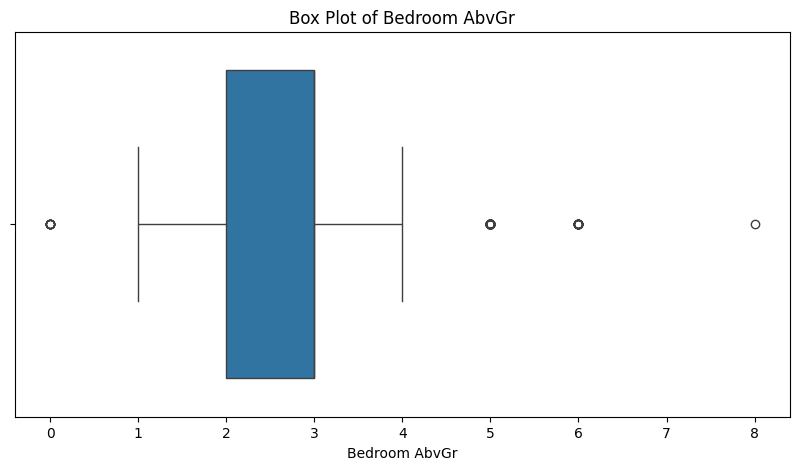

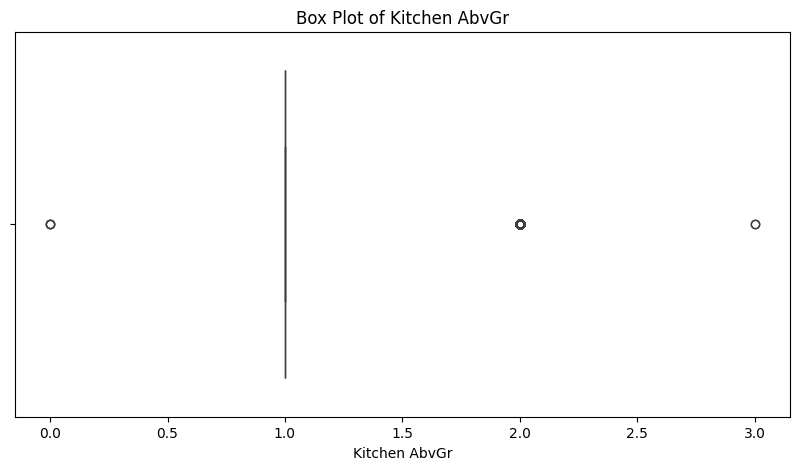

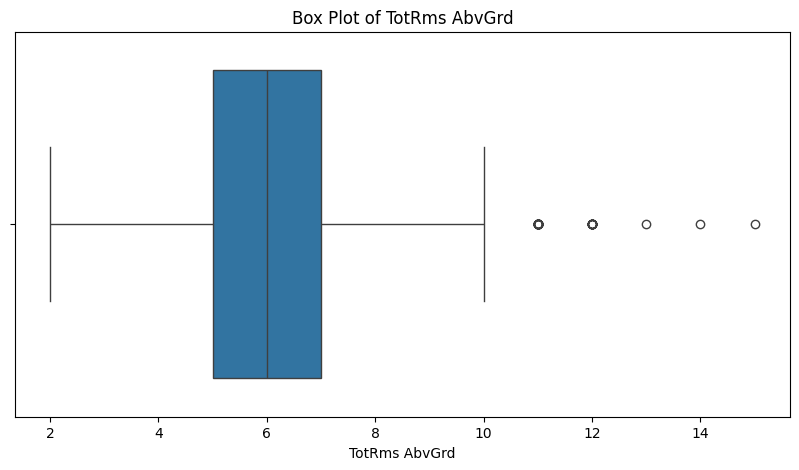

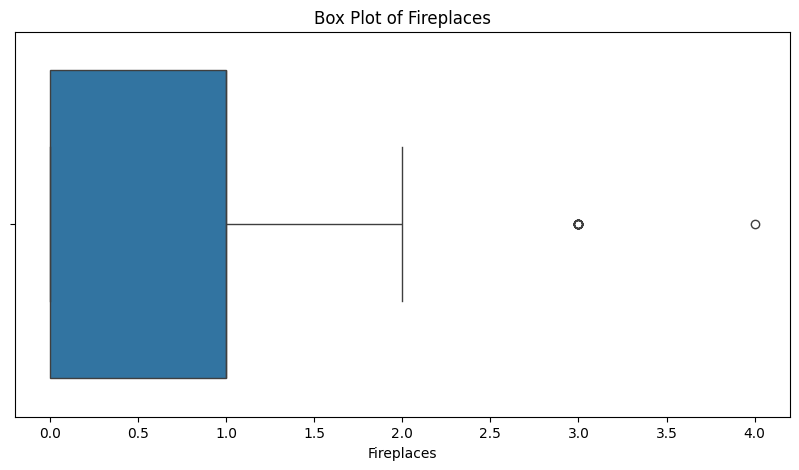

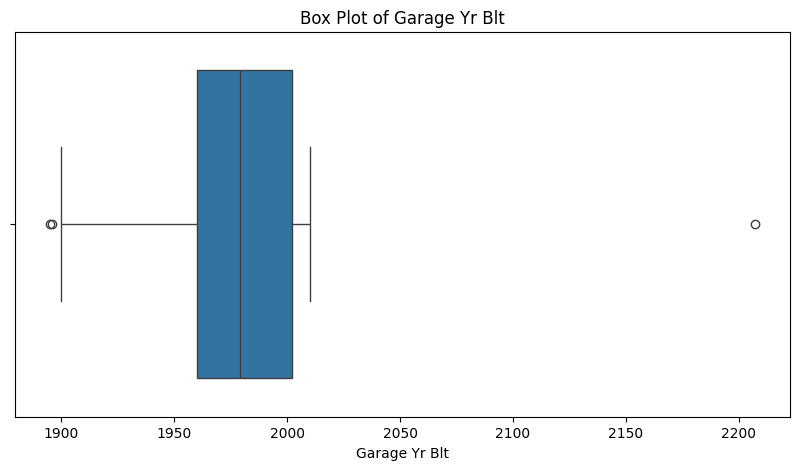

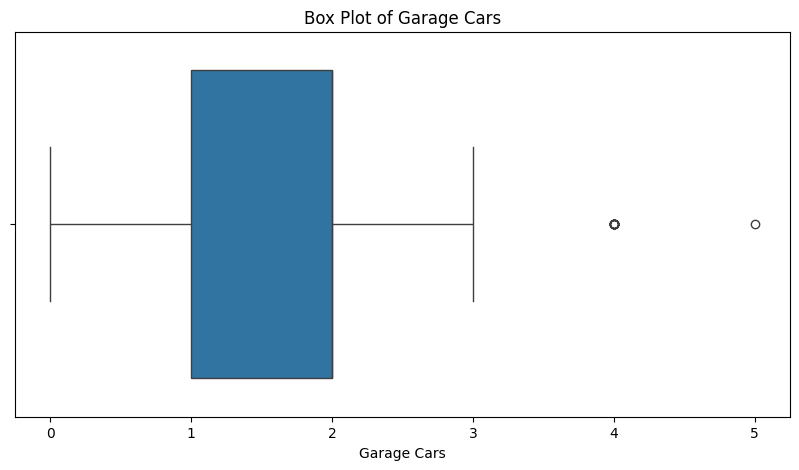

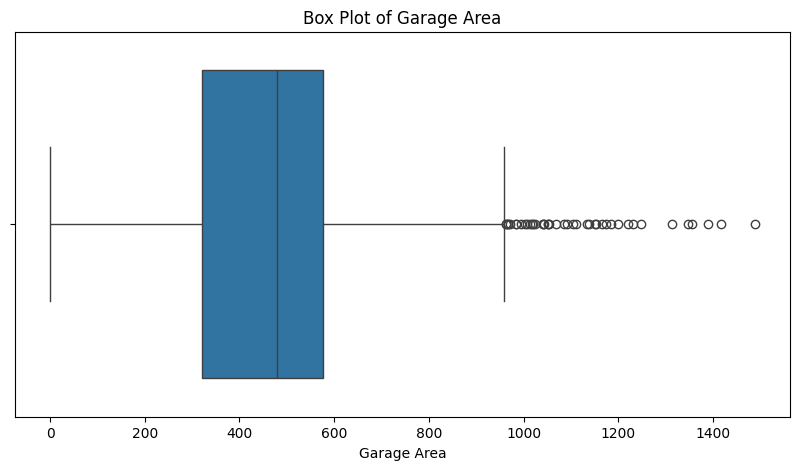

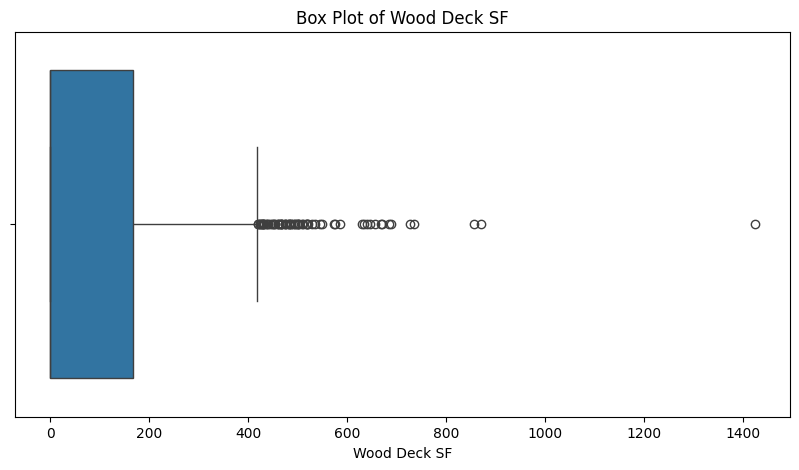

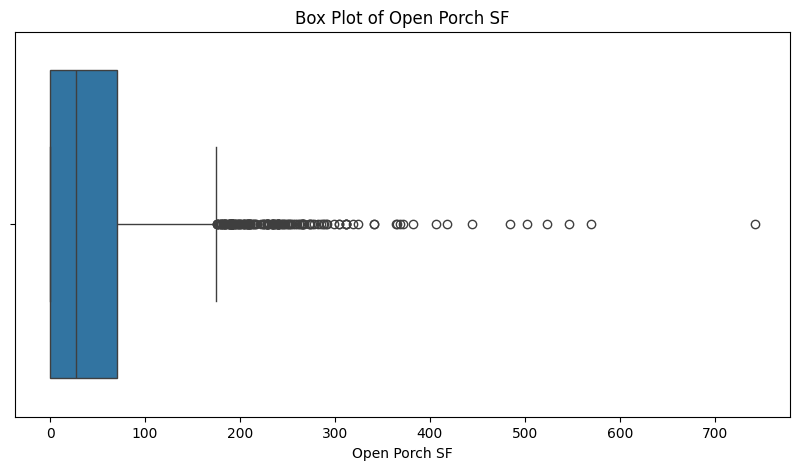

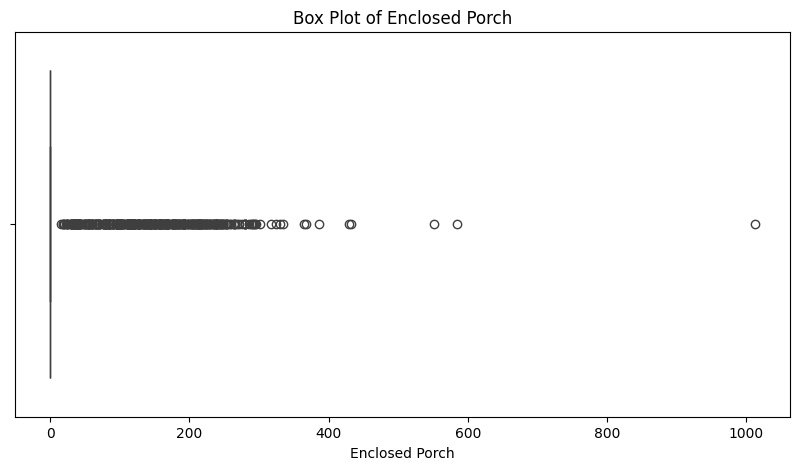

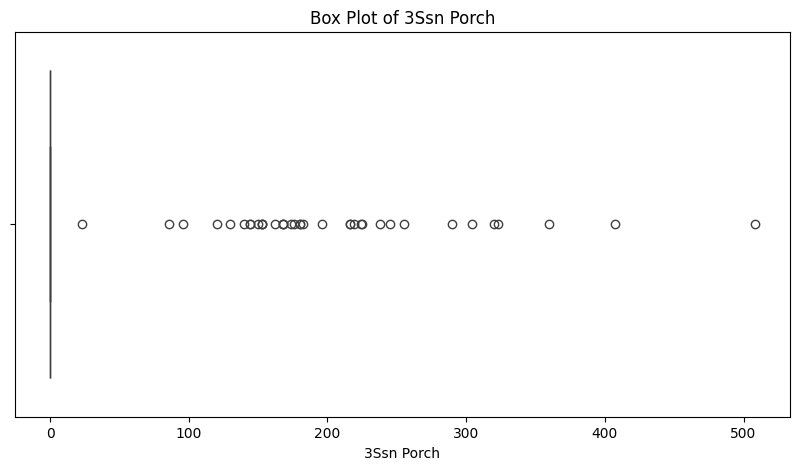

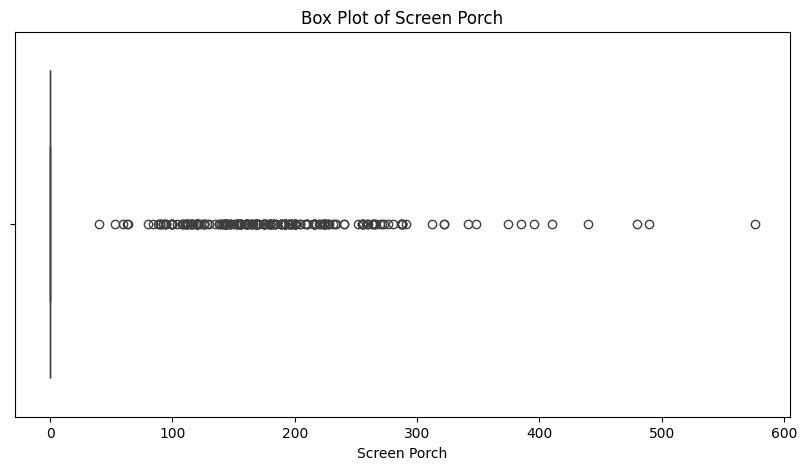

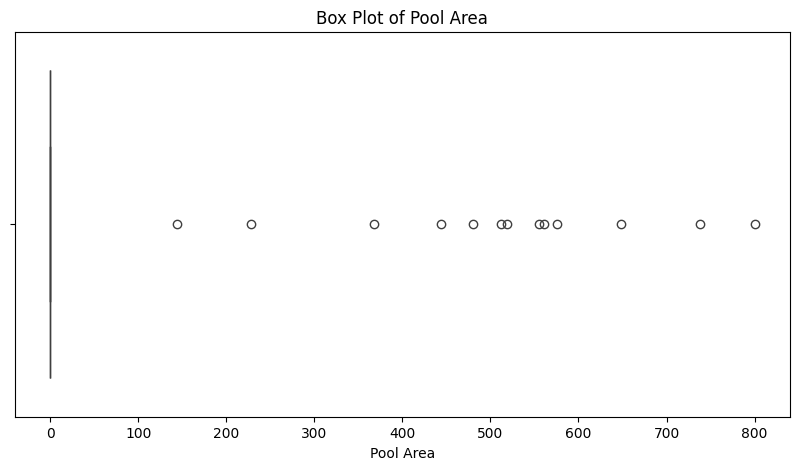

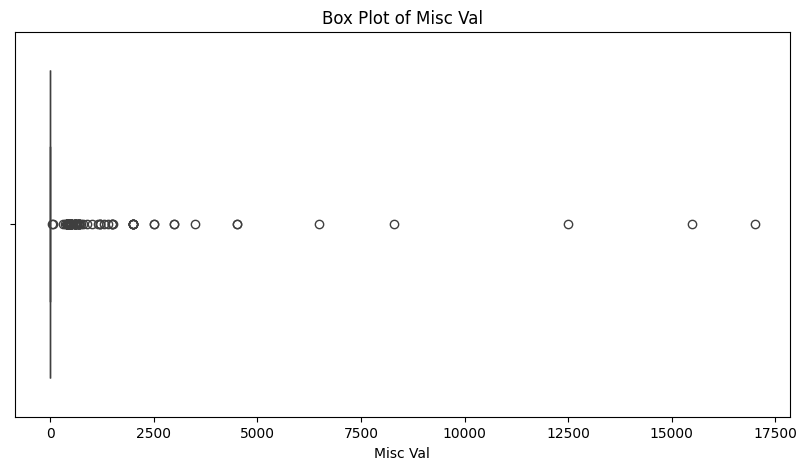

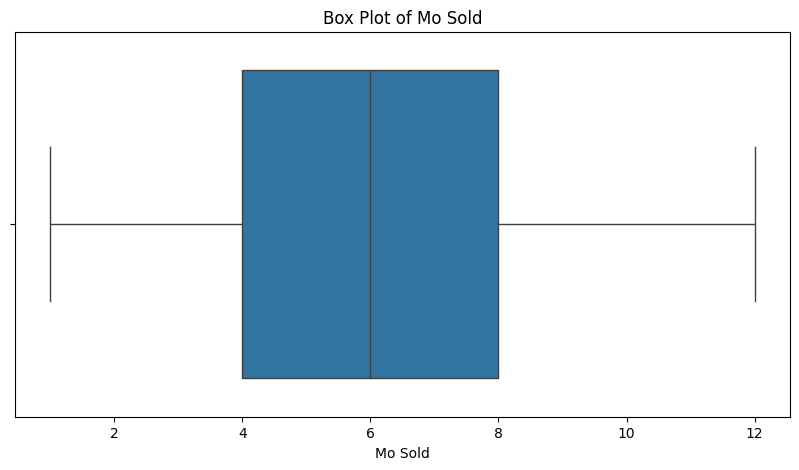

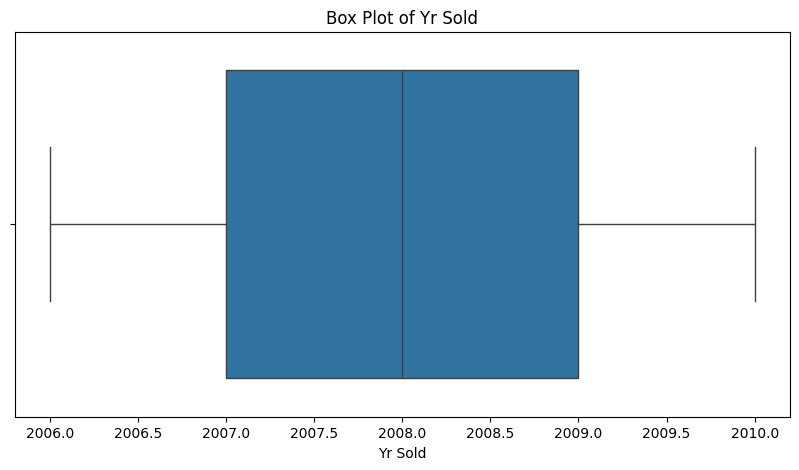

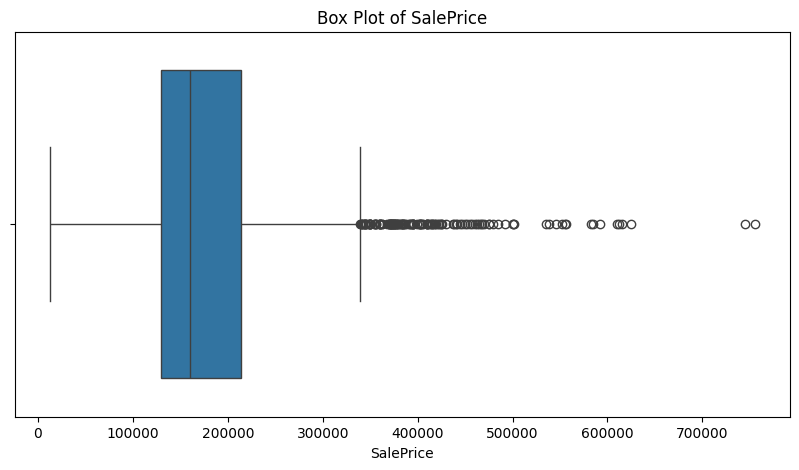

In [88]:
#plot box plot for all numerical columns
for col in numerical_in_data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [89]:
#retrieve columns with Pearson correlation greater than 0.5 and print them
correlated_columns = top_features.index.tolist()
print("Columns with Pearson correlation greater than 0.5:", correlated_columns)

Columns with Pearson correlation greater than 0.5: ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area']


In [ ]:
#first sort the data by 'Overall Qual' and select the last 3
data.sort_values(by = 'Overall Qual', ascending = False)[:3]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1064,1064,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
1052,1052,528102110,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
1053,1053,528104050,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000


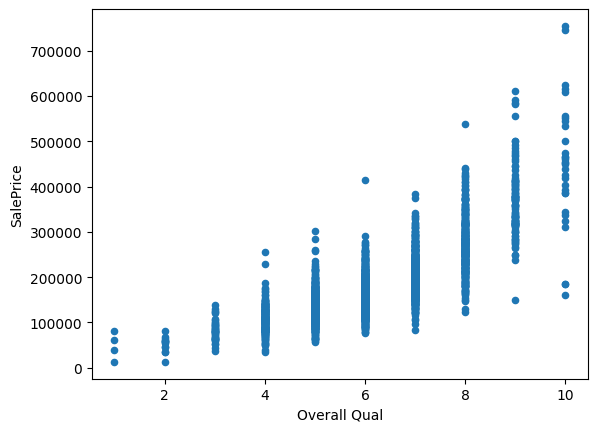

In [92]:
price_area = data.plot.scatter(x='Overall Qual',
                      y='SalePrice')

In [ ]:
#first sort the data by 'Overall Qual' and select the last 3
data.sort_values(by = 'Overall Qual', ascending = False)[:3]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1064,1064,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
1052,1052,528102110,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
1053,1053,528104050,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000


In [100]:
#use the pandas drop() function to delete the outliers
outliers_droped = data.drop(data.index[[977,1246,1369]])

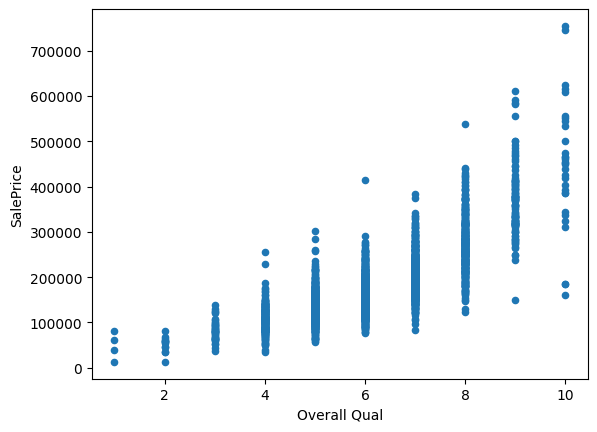

In [101]:
new_price_area = outliers_droped.plot.scatter(x='Overall Qual',
                      y='SalePrice')